In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sc


P1 fit values:  -354.1672442036256   3.4961813604715757
P2 fit values:  -295.2454917645736   3.095195044736808
P3 fit values:  -315.43236256388855   3.1773597555502326


P1 current cal values: -340.566 3.44028 --Multiplied by 1.016:  -346.01505599999996 3.49532448
P2 current cal values: -292.391 3.05255 --Multiplied by 1.016:  -297.069256 3.1013908000000003
P3 current cal values: -307.894 3.13171 --Multiplied by 1.016:  -312.820304 3.18181736


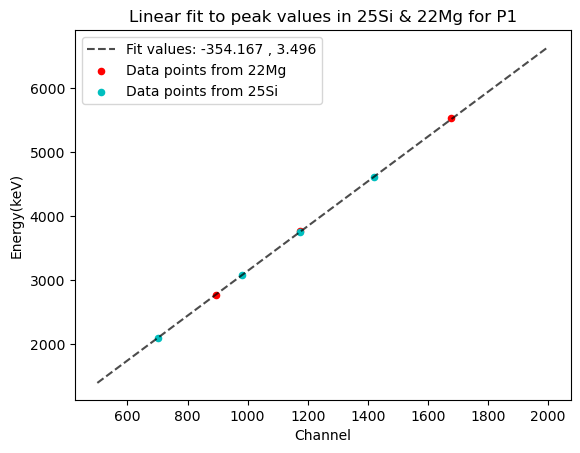

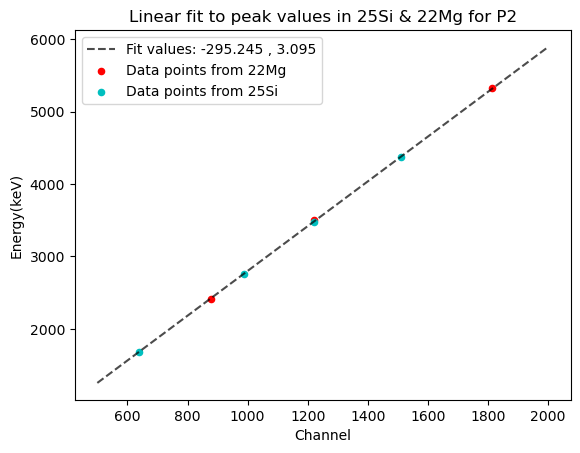

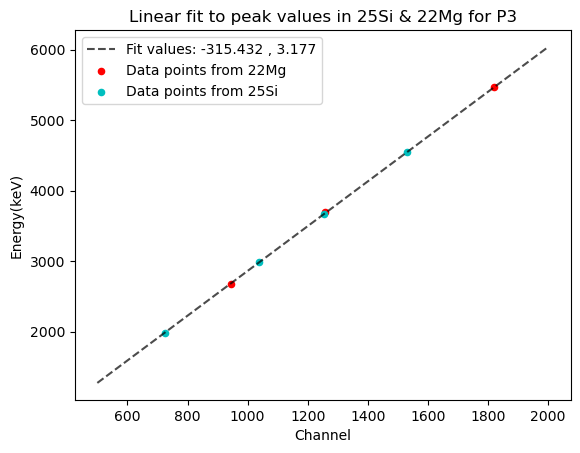

In [ ]:
##These values here are manually fitted, to the entire extend of the 
P3_cal = [1986.6, 2984.68,3664.47,4544.04]; P3_cal_err = [0.67,0.38,1.07,0.61]
P2_cal = [1678,2759.4,3476.48,4377.48]; P2_cal_err = [0.9,0.47,1.22,0.75]
P1_cal = [2102.3,3074,3748.64,4610.62]; P1_cal_err = [0.6,0.37,0.9,0.6]
P1_cal_mg = [2768.68,3771.34,5527.1]; P1_cal_mg_err = [1.22,0.98,1.35]
P2_cal_mg = [2416.87,3498.22,5321.97]; P2_cal_mg_err = [1.75,1.27,1.83]
P3_cal_mg = [2676.00,3696.08,5472.32]; P3_cal_mg_err = [1.22,0.92,1.41]
means, sigs = np.loadtxt("/home/haue/repositories/Masters/data/padcal/sipeakvals.dat", unpack=True)
means2, sigs2 = np.loadtxt("/home/haue/repositories/Masters/data/padcal/mgpeakvals.dat", unpack=True)
P1ch = means[:4]; P1chs = sigs[:4]; P1ch_mg = means2[1:4]; P1chs_mg = sigs[1:4]
P2ch = means[4:8]; P2chs = sigs[4:8]; P2ch_mg = means2[5:8]; P2chs_mg = sigs[5:8]
P3ch = means[8:12]; P3chs = sigs[8:12]; P3ch_mg = means2[9:12]; P3chs_mg = sigs[9:12]
P_cals = [P1_cal+P1_cal_mg, P2_cal+P2_cal_mg, P3_cal+P3_cal_mg]
P_ch = [np.concatenate((P1ch, P1ch_mg)), np.concatenate((P2ch, P2ch_mg)), np.concatenate((P3ch, P3ch_mg))]
P_ch_mg = [P1ch_mg, P2ch_mg, P3ch_mg]; P_ch_si = [P1ch, P2ch,P3ch]
P_cal_mg = [P1_cal_mg,P2_cal_mg,P3_cal_mg]; P_cal_si = [P1_cal,P2_cal,P3_cal]
P_err =  [P1_cal_err+P1_cal_mg_err, P2_cal_err+P2_cal_mg_err, P3_cal_err+P3_cal_mg_err]

def linfun(x,a,b):
    return a*x+b

ab = []
for i in range(3):
    plt.figure()
    popt, _ = sc.curve_fit(linfun, P_ch[i], P_cals[i], sigma=P_err[i])
    xs = np.linspace(500, 2000)
    a,b = popt
    print(f"P{i+1} fit values: ",b," ",a)
    plt.title(f"Linear fit to peak values in 25Si & 22Mg for P{i+1}")
    plt.xlabel("Channel")
    plt.ylabel("Energy(keV)")
    plt.plot(xs,linfun(xs,a,b), ls='--', color='k',alpha=0.7, label=f"Fit values: {np.round(b,3)} , {np.round(a,3)}")
    plt.scatter(P_ch_mg[i], P_cal_mg[i], s=20, color='r', label="Data points from 22Mg")
    plt.scatter(P_ch_si[i],P_cal_si[i], s=20, color='c', label="Data points from 25Si")
    plt.legend()
print("P1 current cal values: -340.566 3.44028", "--Multiplied by 1.016: ",-340.566*1.016, 3.44028*1.016)
print("P2 current cal values: -292.391 3.05255", "--Multiplied by 1.016: ",-292.391*1.016, 3.05255*1.016)
print("P3 current cal values: -307.894 3.13171", "--Multiplied by 1.016: ",-307.894*1.016, 3.13171*1.016)
## multiplicative factor 1.016
#P1 fit values:  -366.4602028890666   3.509486213833647
#P2 fit values:  -298.80767523258913   3.098556517850286
#P3 fit values:  -322.2610628644259   3.18333332817451

In [ ]:
#top fits
